# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [2]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.

In [3]:
y = weather_df['Temperature (C)']
X = weather_df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

lrm = LinearRegression()

lrm.fit(X, y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

predictions = lrm.predict(X)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285384


- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

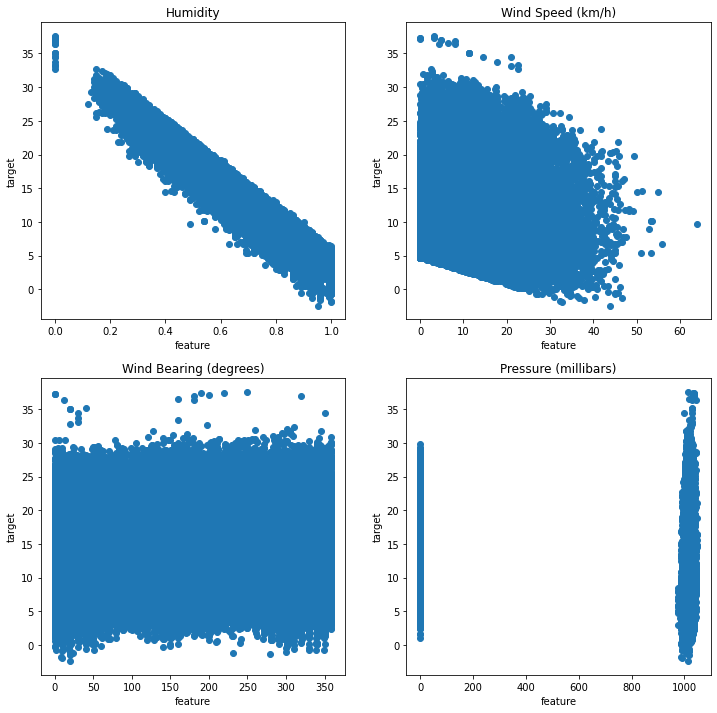

In [4]:
# Assumption one: linearity of the model in the coefficients

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(X['Humidity'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Humidity")

plt.subplot(2, 2, 2)
plt.scatter(X['Wind Speed (km/h)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Speed (km/h)")

plt.subplot(2, 2, 3)
plt.scatter(X['Wind Bearing (degrees)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Bearing (degrees)")

plt.subplot(2, 2, 4)
plt.scatter(X['Pressure (millibars)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Pressure (millibars)")

plt.show()

Humidity is clearly linear. Wind speed also seems to be linear. Wind Bearing and Pressure doesn't look linear.

In [5]:
# Assumption two: the error term should be zero on average

errors = y - predictions

print("Mean of the errors in temperature model is: {}".format(np.mean(errors)))

Mean of the errors in temperature model is: -2.5354426101856083e-15


A mean of -2.5 for the errors indicate that our model systematically overpredicts the target variable. However, according to the content section, "as long as we include a constant in a model, we shouldn't be worried about this assumption as the constant will force the error terms to be zero on average."

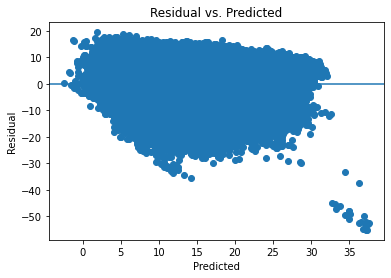

In [6]:
# Assumption three: homoscedasticity (visualization)

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [7]:
# Assumption three: homoscedasticity (Bartlett and the Levene tests)
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are 0, i.e., they are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

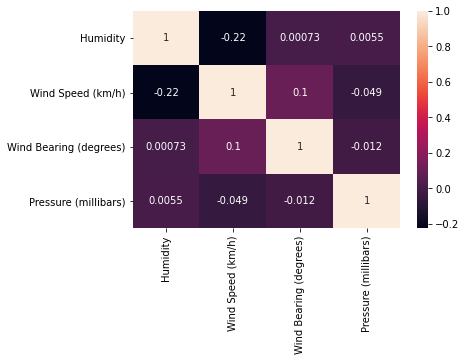

In [8]:
# Assumption four: low multicollinearity

sns.heatmap(X.corr(), annot=True)
plt.show()

There are no high correlations between any of the variables. Therefore, there is no multicollinearity.

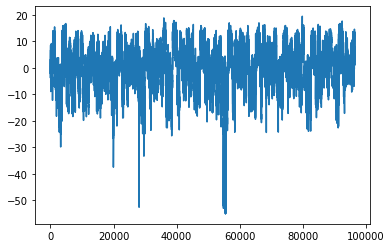

In [9]:
# Assumption five: error terms should be uncorrelated with one other (visualization)

plt.plot(errors)
plt.show()

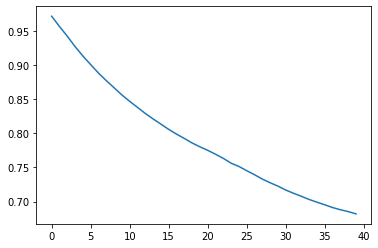

In [10]:
# Assumption five: error terms should be uncorrelated with one other (autocorrelation function)

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of the model is ranging between 1 and 0.65, which indicates that there may be a correlation between error terms.

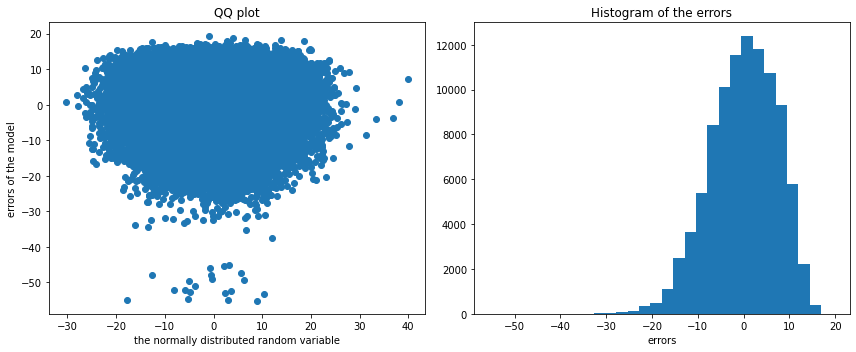

In [11]:
# Assumption six: features shouldn't be correlated with the errors (visualization)

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors, bins=30)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [12]:
# Assumption six: features shouldn't be correlated with the errors (Jarque Bera and normal test)

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252353 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [13]:
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Reimplement the model you built in the previous lesson. 

In [14]:
df_null_ratios = df.isna().sum() / len(df)
df.drop(df_null_ratios[df_null_ratios > .1].index, axis=1, inplace=True)
df.dropna(inplace=True)

In [15]:
X_num = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]

ExterQual = pd.get_dummies(df['ExterQual'], drop_first=True)
BsmtQual = pd.get_dummies(df['BsmtQual'], drop_first=True)
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], drop_first=True)
KitchenQual = pd.get_dummies(df['KitchenQual'], drop_first=True)
GarageQual = pd.get_dummies(df['GarageQual'], drop_first=True)
GarageCond = pd.get_dummies(df['GarageCond'], drop_first=True)

X_cat = pd.concat([ExterQual, BsmtQual, BsmtFinType1, KitchenQual, GarageQual, GarageCond], axis=1)

In [16]:
scaler = StandardScaler()

X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

In [17]:
X = pd.concat([X_num, X_cat], axis=1)

X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,Fa,Gd,TA,Fa,Gd,TA,BLQ,GLQ,LwQ,Rec,Unf,Fa,Gd,TA,Fa,Gd,Po,TA,Fa,Gd,Po,TA
0,0.589337,0.331321,0.202747,-0.591875,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,-0.165963,-0.529579,0.202747,0.409598,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0.589337,0.477367,0.202747,-0.434007,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.589337,0.344773,1.779928,-0.838543,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1.344638,1.269088,1.779928,0.120996,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [18]:
y = df['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [19]:
lrm = LinearRegression()

lrm.fit(X, y)

print('Coefficients: {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

predictions = lrm.predict(X)

Coefficients: [ 1.93052263e+04  2.57771861e+04  9.85739161e+03  7.21815810e+03
 -4.27364461e+04 -1.75916093e+04 -2.52349719e+04 -4.17154539e+04
 -3.46195454e+04 -4.01152286e+04  4.77855546e+01  2.50245548e+03
 -1.14978156e+04 -5.39648502e+03 -1.76527634e+04 -3.71738089e+04
 -2.78921284e+04 -3.67609025e+04 -1.01918926e+05 -8.48861206e+04
 -9.36999844e+04 -9.62843325e+04  7.31994974e+04  8.04402727e+04
  6.44431983e+04  8.13568909e+04]

Intercept: 293581.8702330848


- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

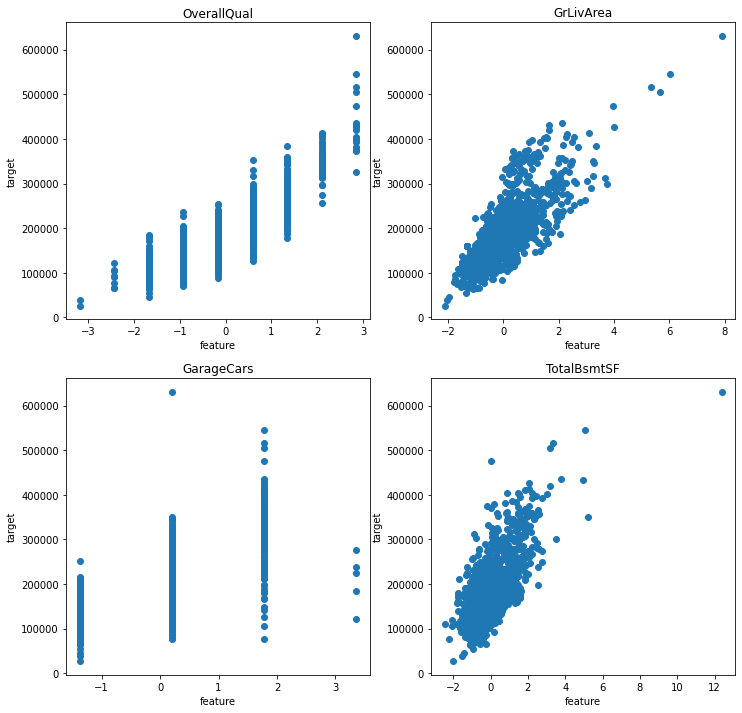

In [20]:
# Assumption one: linearity of the model in the coefficients

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(X_num['OverallQual'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("OverallQual")

plt.subplot(2, 2, 2)
plt.scatter(X_num['GrLivArea'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GrLivArea")

plt.subplot(2, 2, 3)
plt.scatter(X_num['GarageCars'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GarageCars")

plt.subplot(2, 2, 4)
plt.scatter(X_num['TotalBsmtSF'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("TotalBsmtSF")

plt.show()

This time, all numerical columns seems to be linear.

In [21]:
# Assumption two: the error term should be zero on average

errors = y - predictions

print("Mean of the errors in house prices model is: {}".format(np.mean(errors)))

Mean of the errors in house prices model is: -3.667343658449404e-11


A mean of -3.7 for the errors indicate that our model systematically overpredicts the target variable. However, according to the content section, "as long as we include a constant in a model, we shouldn't be worried about this assumption as the constant will force the error terms to be zero on average."

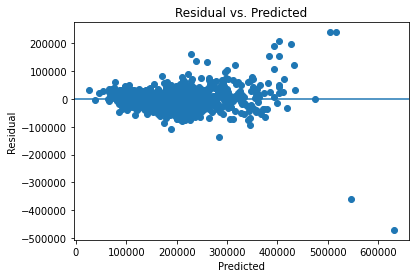

In [22]:
# Assumption three: homoscedasticity (visualization)

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [23]:
# Assumption three: homoscedasticity (Bartlett and the Levene tests)
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 617.838 and p value is 2.21e-136
Levene test statistic value is 441.082 and p value is 9.08e-91


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

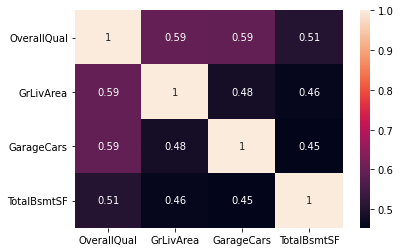

In [24]:
# Assumption four: low multicollinearity

sns.heatmap(X_num.corr(), annot=True)
plt.show()

There is at most 0.6 correlation between our chosen features, which may result in multicollinearity.

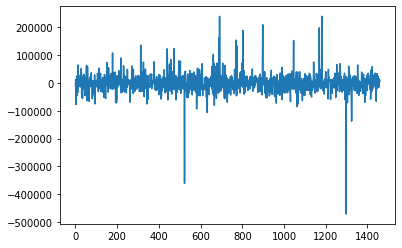

In [25]:
# Assumption five: error terms should be uncorrelated with one other (visualization)

plt.plot(errors)
plt.show()

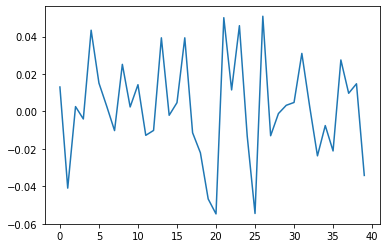

In [26]:
# Assumption five: error terms should be uncorrelated with one other (autocorrelation function)

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of our house price model is very low (ranging between -0.06 and 0.05).

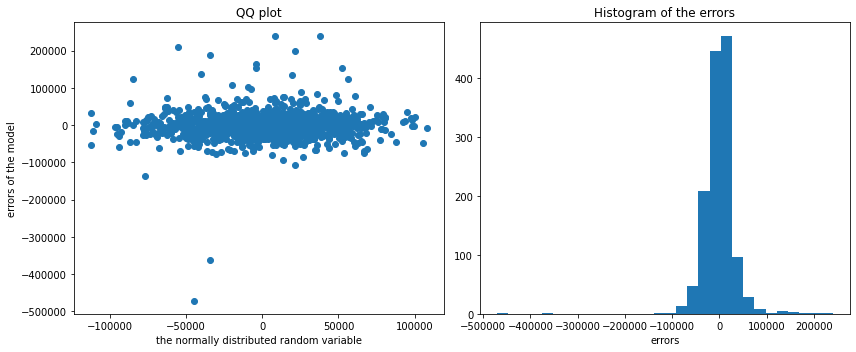

In [27]:
# Assumption six: features shouldn't be correlated with the errors (visualization)

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors, bins=30)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [28]:
# Assumption six: features shouldn't be correlated with the errors (Jarque Bera and normal test)

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 85127.4938782628 and p value is 0.0
Normality test statistics is 708.2088917161136 and p value is 1.638298925573947e-154


The p-values of both tests indicate that our errors are not normally distributed.